In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap as lsc

In [2]:
df=pd.read_csv("test_data_1.csv", header=None,names=["movie_id", "user_id","rating"])
df.head()

,movie_id,user_id,rating
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3


In [3]:
df1 = df[df["movie_id"]==1].drop(["movie_id"],axis=1)
df1.head()

,user_id,rating
0,1488844,3
1,822109,5
2,885013,4
3,30878,4
4,823519,3


In [4]:
df2 = df[df["movie_id"]==2].drop(["movie_id"],axis=1)
df2.head()

,user_id,rating
547,2059652,4
548,1666394,3
549,1759415,4
550,1959936,5
551,998862,4


In [5]:
df_join = df1.merge(df2, on="user_id",how="outer")
df_join.head(10)

,user_id,rating_x,rating_y
0,1488844,3.0,NaN
1,822109,5.0,NaN
2,885013,4.0,NaN
3,30878,4.0,NaN
4,823519,3.0,NaN
5,893988,3.0,NaN
6,124105,4.0,NaN
7,1248029,3.0,NaN
8,1842128,4.0,NaN
9,2238063,3.0,NaN


In [6]:
df_join.dropna()

,user_id,rating_x,rating_y
93,636262,1.0,1.0
101,2439493,1.0,1.0
163,1374216,2.0,1.0
216,1664010,5.0,4.0
327,305344,1.0,1.0
417,1398626,2.0,3.0
434,1806515,3.0,3.0
436,2118461,5.0,4.0
442,387418,1.0,1.0
516,515436,1.0,1.0


In [7]:
x1=list(df_join.dropna()["rating_x"])
x2=list(df_join.dropna()["rating_y"])

In [8]:
x1

[1.0, 1.0, 2.0, 5.0, 1.0, 2.0, 3.0, 5.0, 1.0, 1.0]

In [9]:
x2

[1.0, 1.0, 1.0, 4.0, 1.0, 3.0, 3.0, 4.0, 1.0, 1.0]

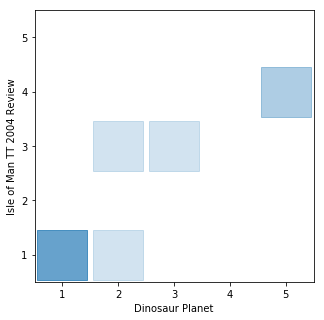

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(x1,x2,alpha=0.2,marker="s",s=2500)
plt.xlim(0.5,5.5)
plt.ylim(0.5,5.5)
plt.xlabel("Dinosaur Planet")
plt.ylabel("Isle of Man TT 2004 Review")
plt.show()

In [11]:
x1a=list(df_join.fillna(0)["rating_x"])
x2a=list(df_join.fillna(0)["rating_y"])

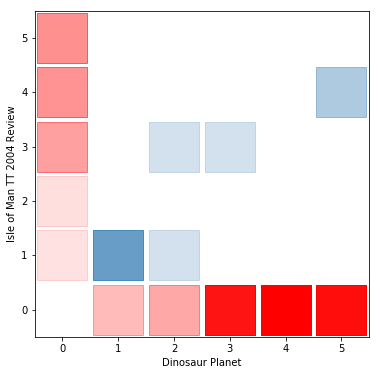

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(x1a,x2a,alpha=0.01,marker="s",s=2500,c="r")
plt.scatter(x1,x2,alpha=0.2,marker="s",s=2500)
plt.xlim(-0.5,5.5)
plt.ylim(-0.5,5.5)
plt.xlabel("Dinosaur Planet")
plt.ylabel("Isle of Man TT 2004 Review")
plt.show()

In [13]:
titles_df = pd.read_csv("../movie_titles.csv",header = None, names = ['movie_id', 'year', 'title'], usecols=[0,1,2],encoding = "ISO-8859-1")
titles_df.head()

,movie_id,year,title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [14]:
titles_df[titles_df.movie_id==4501].iloc[0].title

'Open Hearts'

In [15]:
def plot_compare(df, col1="rating_x",col2="rating_y",use_na=True, alpha_main=0.2, alpha_na=0.01,xlabel="",ylabel=""):
    x1=list(df.dropna()[col1])
    x2=list(df.dropna()[col2])
    
    size = 6 if use_na else 5
    plt.figure(figsize=(size,size))
    
    if use_na:
        x1a=list(df.fillna(0)[col1])
        x2a=list(df.fillna(0)[col2])
        plt.scatter(x1a,x2a,alpha=alpha_na,marker="s",s=2500,c="r")
        
    plt.scatter(x1,x2,alpha=alpha_main,marker="s",s=2500)
    plt.xlim(5.5-size,5.5)
    plt.ylim(5.5-size,5.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

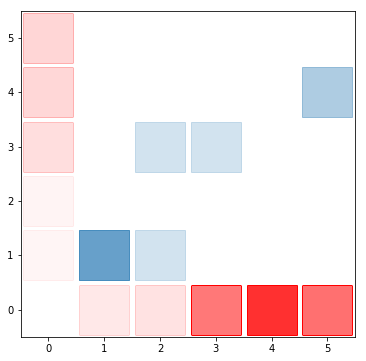

In [16]:
plot_compare(df_join,use_na=True,alpha_na=0.005)

In [17]:
def jitter(input_list, amount=0.7):
    return np.random.sample([len(input_list)])*amount+np.array(input_list)-amount/2

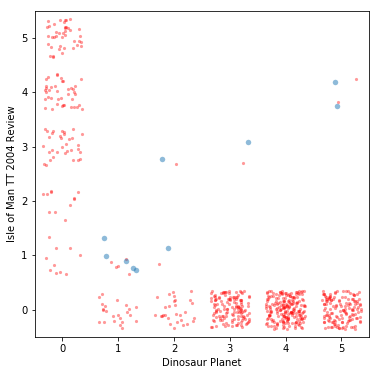

In [18]:
plt.figure(figsize=(6,6))
plt.scatter(jitter(x1a),jitter(x2a),alpha=0.4,marker="o",s=10,c="r",linewidths=0)
plt.scatter(jitter(x1),jitter(x2),alpha=0.5,marker="o",s=30,linewidths=0)
plt.xlim(-0.5,5.5)
plt.ylim(-0.5,5.5)
plt.xlabel("Dinosaur Planet")
plt.ylabel("Isle of Man TT 2004 Review")
plt.show()

In [19]:
dfs=pd.Series([(x1a[i],x2a[i]) for i in np.arange(len(x1a))]).value_counts()
dfs

(4.0, 0.0)    207
(5.0, 0.0)    143
(3.0, 0.0)    135
(0.0, 5.0)     41
(0.0, 4.0)     40
(0.0, 3.0)     33
(2.0, 0.0)     29
(1.0, 0.0)     23
(0.0, 2.0)     11
(0.0, 1.0)     10
(1.0, 1.0)      5
(5.0, 4.0)      2
(2.0, 3.0)      1
(3.0, 3.0)      1
(2.0, 1.0)      1
dtype: int64

In [20]:
def get_title(df, movie_id):
    return df[df.movie_id==movie_id].iloc[0].title

In [21]:
def plot_compare_df(df, id1, id2, use_na=True, alpha_main=0.2, alpha_na=0.01, title_ref = None):
    df1 = df[df["movie_id"]==id1].drop(["movie_id"],axis=1)
    df2 = df[df["movie_id"]==id2].drop(["movie_id"],axis=1)
    df_join = df1.merge(df2, on="user_id",how="outer")
    
    xlabel, ylabel = "",""
    if title_ref is not None:
        xlabel = get_title(title_ref, id1)
        ylabel = get_title(title_ref, id2)
    
    plot_compare(df_join, use_na=use_na, alpha_main=alpha_main, alpha_na=alpha_na, xlabel=xlabel, ylabel=ylabel)

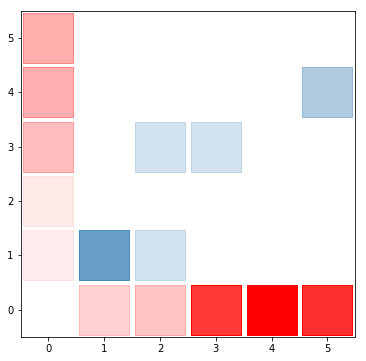

In [22]:
plot_compare_df(df, 1,2,alpha_na=0.006)

In [23]:
df_join.loc[(df_join.rating_x==1)&(df_join.rating_y==1)]

,user_id,rating_x,rating_y
93,636262,1.0,1.0
101,2439493,1.0,1.0
327,305344,1.0,1.0
442,387418,1.0,1.0
516,515436,1.0,1.0


In [24]:
def get_compare_counts(df, col1="rating_x", col2="rating_y"):
    df_fill = df.fillna(0)
    output = []
    for i in range(6):
        for j in range(6):
            n = len(df_fill[(df_fill[col1]==i)&(df_fill[col2]==j)])
            output.append([i,j,n])
    return output

In [25]:
def get_compare_counts_df(df, id1, id2):
    df1 = df[df["movie_id"]==id1].drop(["movie_id"],axis=1)
    df2 = df[df["movie_id"]==id2].drop(["movie_id"],axis=1)
    df_join = df1.merge(df2, on="user_id",how="outer")
    
    return get_compare_counts(df_join)

In [26]:
list(zip(*get_compare_counts(df_join)))

[(0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  5,
  5,
  5),
 (0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5,
  0,
  1,
  2,
  3,
  4,
  5),
 (0,
  10,
  11,
  33,
  40,
  41,
  23,
  5,
  0,
  0,
  0,
  0,
  29,
  1,
  0,
  1,
  0,
  0,
  135,
  0,
  0,
  1,
  0,
  0,
  207,
  0,
  0,
  0,
  0,
  0,
  143,
  0,
  0,
  0,
  2,
  0)]

In [27]:
count_nz=[x for x in get_compare_counts(df_join) if x[0]*x[1]>0]
count_na=[x for x in get_compare_counts(df_join) if x[0]*x[1]==0]

In [28]:
[x1_nz, x2_nz, n_nz] = list(zip(*count_nz))
[x1_na, x2_na, n_na] = list(zip(*count_na))

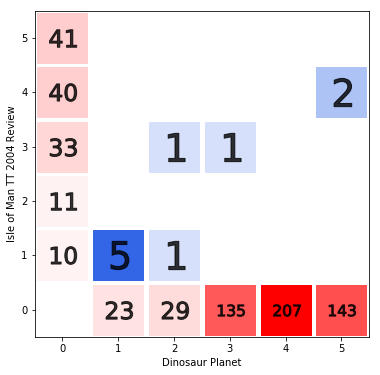

In [29]:
plt.figure(figsize=(6,6))

cmap_na = lsc.from_list("", ["white","red"])
cmap_nz = lsc.from_list("", ["white",(.2,.4,.9,1)])

plt.scatter(x1_na,x2_na,c=[x/max(n_na+(1,)) for x in n_na],cmap=cmap_na,marker="s",s=2500)
plt.scatter(x1_nz,x2_nz,c=[x/max(n_nz+(1,)) for x in n_nz],cmap=cmap_nz,marker="s",s=2500)

# These look kinda weird. 
for i in range(len(x1_na)):
    plt.scatter(x1_na[i],x2_na[i],c="black",marker=f"${n_na[i]}$" if n_na[i]>0 else "",s=800,alpha=0.8)
for i in range(len(x1_nz)):
    plt.scatter(x1_nz[i],x2_nz[i],c="black",marker=f"${n_nz[i]}$" if n_nz[i]>0 else "",s=800,alpha=0.8)

plt.xlim(-0.5,5.5)
plt.ylim(-0.5,5.5)
plt.xlabel("Dinosaur Planet")
plt.ylabel("Isle of Man TT 2004 Review")
plt.show()

In [30]:
df_big = pd.read_csv("../all_ratings.csv",skiprows=(lambda x: x>10000))

In [31]:
df_big.movie_id.value_counts()

4506    6850
4503    1779
4501     595
4500     258
4505     238
4504     176
4502     104
Name: movie_id, dtype: int64

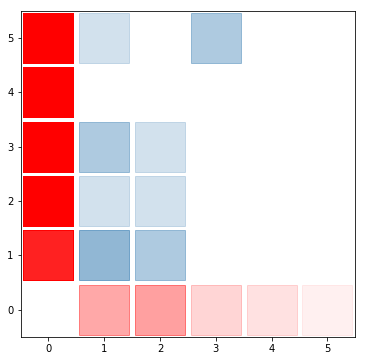

In [32]:
plot_compare_df(df_big,4502,4503)

In [33]:
get_compare_counts_df(df_big,4502,4504)

[[0, 0, 0],
 [0, 1, 25],
 [0, 2, 16],
 [0, 3, 55],
 [0, 4, 43],
 [0, 5, 27],
 [1, 0, 31],
 [1, 1, 3],
 [1, 2, 0],
 [1, 3, 1],
 [1, 4, 1],
 [1, 5, 0],
 [2, 0, 34],
 [2, 1, 0],
 [2, 2, 1],
 [2, 3, 2],
 [2, 4, 0],
 [2, 5, 0],
 [3, 0, 14],
 [3, 1, 0],
 [3, 2, 0],
 [3, 3, 0],
 [3, 4, 2],
 [3, 5, 0],
 [4, 0, 10],
 [4, 1, 0],
 [4, 2, 0],
 [4, 3, 0],
 [4, 4, 0],
 [4, 5, 0],
 [5, 0, 5],
 [5, 1, 0],
 [5, 2, 0],
 [5, 3, 0],
 [5, 4, 0],
 [5, 5, 0]]

In [34]:
def rough_correl_v1(df, id1, id2):
    c = get_compare_counts_df(df, id1, id2)
    total = sum([x[2] for x in c if x[0]*x[1]>0])
    if total == 0:
        return (0,0)
    pos_c = sum([c[i][2] for i in [7,8,13,14, 28,29,34,35]])
    neg_c = sum([c[i][2] for i in [10,11,16,17, 25,26,31,32]])
    result = (pos_c-neg_c)/total
    return (result, total)

In [35]:
blah= get_compare_counts_df(df_big,4502,4504)

In [36]:
sum([x[2] for x in blah if x[0]*x[1]>0])

10

In [37]:
[(i,blah[i]) for i in range(len(blah))]

[(0, [0, 0, 0]),
 (1, [0, 1, 25]),
 (2, [0, 2, 16]),
 (3, [0, 3, 55]),
 (4, [0, 4, 43]),
 (5, [0, 5, 27]),
 (6, [1, 0, 31]),
 (7, [1, 1, 3]),
 (8, [1, 2, 0]),
 (9, [1, 3, 1]),
 (10, [1, 4, 1]),
 (11, [1, 5, 0]),
 (12, [2, 0, 34]),
 (13, [2, 1, 0]),
 (14, [2, 2, 1]),
 (15, [2, 3, 2]),
 (16, [2, 4, 0]),
 (17, [2, 5, 0]),
 (18, [3, 0, 14]),
 (19, [3, 1, 0]),
 (20, [3, 2, 0]),
 (21, [3, 3, 0]),
 (22, [3, 4, 2]),
 (23, [3, 5, 0]),
 (24, [4, 0, 10]),
 (25, [4, 1, 0]),
 (26, [4, 2, 0]),
 (27, [4, 3, 0]),
 (28, [4, 4, 0]),
 (29, [4, 5, 0]),
 (30, [5, 0, 5]),
 (31, [5, 1, 0]),
 (32, [5, 2, 0]),
 (33, [5, 3, 0]),
 (34, [5, 4, 0]),
 (35, [5, 5, 0])]

In [38]:
rough_correl_v1(df_big, 4502,4504)

(0.3, 10)

In [39]:
rough_correl_v1(df_big, 4506,4506)

(0.7741605839416058, 6850)

In [40]:
for i in range(4500,4506):
    for j in range(i+1,4507):
        print(f"{i} x {j}: {rough_correl_v1(df_big, i,j)}")

4500 x 4501: (0.6666666666666666, 12)
4500 x 4502: (0.7142857142857143, 7)
4500 x 4503: (0.21428571428571427, 28)
4500 x 4504: (0.8181818181818182, 11)
4500 x 4505: (0.0, 1)
4500 x 4506: (0.14285714285714285, 21)
4501 x 4502: (0.5714285714285714, 7)
4501 x 4503: (0.375, 24)
4501 x 4504: (0.5555555555555556, 9)
4501 x 4505: (-0.6666666666666666, 3)
4501 x 4506: (0.2608695652173913, 23)
4502 x 4503: (0.46153846153846156, 13)
4502 x 4504: (0.3, 10)
4502 x 4505: (0.4, 5)
4502 x 4506: (0.0, 4)
4503 x 4504: (0.4583333333333333, 24)
4503 x 4505: (0.6666666666666666, 3)
4503 x 4506: (0.1921182266009852, 203)
4504 x 4505: (0, 0)
4504 x 4506: (0.45454545454545453, 11)
4505 x 4506: (-0.6, 5)


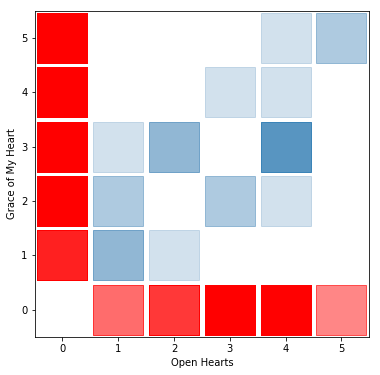

Correlation, Samples: (0.375, 24)


In [41]:
plot_compare_df(df_big,4501,4503,title_ref=titles_df)
print(f"Correlation, Samples: {rough_correl_v1(df_big, 4501, 4503)}")

In [42]:
for i in range(4500,4507):
    print(f"{i} x {i}: {rough_correl_v1(df_big, i,i)}")

4500 x 4500: (0.6976744186046512, 258)
4501 x 4501: (0.6369747899159663, 595)
4502 x 4502: (0.8461538461538461, 104)
4503 x 4503: (0.5941540191118606, 1779)
4504 x 4504: (0.6704545454545454, 176)
4505 x 4505: (0.6638655462184874, 238)
4506 x 4506: (0.7741605839416058, 6850)


In [73]:
def rough_correl_v1_quad(df, id1, id2, title_ref=titles_df):
    c = get_compare_counts_df(df, id1, id2)
    total = sum([x[2] for x in c if x[0]*x[1]>0])
    if total == 0:
        print("No data.")
        return (0,0,0,0,0)
    dd = sum([c[i][2] for i in [7,8,13,14]])
    ll = sum([c[i][2] for i in [28,29,34,35]])
    dl = sum([c[i][2] for i in [10,11,16,17]])
    ld = sum([c[i][2] for i in [25,26,31,32]])
    m1 = get_title(title_ref, id1)
    m2 = get_title(title_ref, id2)
    print(f"Out of {total} users,\n{ll} liked both movies, \n" +
          f"{dd} disliked both movies, \n" +
          f"{dl} disliked '{m1}' but liked '{m2}', and \n" +
          f"{ld} liked '{m1}' but disliked '{m2}'.\n" +
          f"Correlation (v1) is ({dd+ll} - {dl+ld})/{total} = {((dd+ll)-(dl+ld))/total}\n" +
          f"Correlation coefficient is {correl_coeff(df, id1, id2)}")
    return (ll,dd,dl,ld,total)

In [74]:
rough_correl_v1_quad(df_big,4500,4503)

22 40 37
Out of 28 users,
4 liked both movies, 
5 disliked both movies, 
0 disliked 'Les Dames du Bois de Boulogne' but liked 'Grace of My Heart', and 
3 liked 'Les Dames du Bois de Boulogne' but disliked 'Grace of My Heart'.
Correlation (v1) is (9 - 3)/28 = 0.21428571428571427
Correlation coefficient is 0.57186276940104


(4, 5, 0, 3, 28)

In [45]:
rough_correl_v1_quad(df_big,4505,4506)

Out of 5 users,
1 liked both movies, 
0 disliked both movies, 
4 disliked 'Young Gods' but liked 'Breakfast at Tiffany's', and 
0 liked 'Young Gods' but disliked 'Breakfast at Tiffany's'.
Correlation (v1) is (1 - 4)/5 = -0.6


(1, 0, 4, 0, 5)

In [88]:
def correl_coeff(df, id1, id2):
    c = [x for x in get_compare_counts_df(df, id1, id2) if x[0]*x[1]>0]
    mx,my = 3,3
    c_num = sum([x[2]*(x[0]-mx)*(x[1]-my) for x in c])
    c_denx = sum([x[2]*(x[0]-mx)**2 for x in c])
    c_deny = sum([x[2]*(x[1]-my)**2 for x in c])
    c_den = (c_denx*c_deny)**0.5
    
    return c_num/c_den if c_den > 0 else 0

In [89]:
correl_coeff(df_big,4505,4506)

-0.5330017908890261

In [90]:
for i in range(4500,4506):
    for j in range(i+1,4507):
        print(f"{i} x {j}: {rough_correl_v1(df_big, i,j)}, {correl_coeff(df_big, i,j)}")

4500 x 4501: (0.6666666666666666, 12), 0.727392967453308
4500 x 4502: (0.7142857142857143, 7), 0.7756315349925288
4500 x 4503: (0.21428571428571427, 28), 0.57186276940104
4500 x 4504: (0.8181818181818182, 11), 0.8783100656536799
4500 x 4505: (0.0, 1), 0
4500 x 4506: (0.14285714285714285, 21), 0.3872983346207417
4501 x 4502: (0.5714285714285714, 7), 0.7559289460184544
4501 x 4503: (0.375, 24), 0.7055336829505575
4501 x 4504: (0.5555555555555556, 9), 0.8359173188630292
4501 x 4505: (-0.6666666666666666, 3), -0.8164965809277261
4501 x 4506: (0.2608695652173913, 23), 0.4447495899966607
4502 x 4503: (0.46153846153846156, 13), 0.4547542969431243
4502 x 4504: (0.3, 10), 0.5734146386569556
4502 x 4505: (0.4, 5), 0.0
4502 x 4506: (0.0, 4), 0.2672612419124244
4503 x 4504: (0.4583333333333333, 24), 0.6458333333333334
4503 x 4505: (0.6666666666666666, 3), 0.8164965809277261
4503 x 4506: (0.1921182266009852, 203), 0.33501027455582766
4504 x 4505: (0, 0), 0
4504 x 4506: (0.45454545454545453, 11), 0.

In [103]:
correls_compare_x = []
correls_compare_y = []
correls_compare_z = []
for i in range(4500,4506):
    for j in range(i+1,4507):
        correls_compare_x.append(rough_correl_v1(df_big, i,j)[0])
        correls_compare_z.append(rough_correl_v1(df_big, i,j)[1]**0.2)
        correls_compare_y.append(correl_coeff(df_big, i,j))

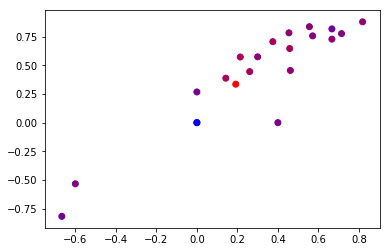

In [104]:
plt.scatter(correls_compare_x, correls_compare_y, c=correls_compare_z, cmap=lsc.from_list("", ["blue","red"]))
plt.show()